<table style="width:100%">
  <tr>
    <td><center style="font-size:300%;">Data Generator and Data Augmentation</center></td>
    <td><img src="https://logodownload.org/wp-content/uploads/2015/02/puc-rio-logo.gif" width="100"/></td> 
  </tr>    
</table>

Evelyn e Leo

In [1]:
%%bash

wget -O resources.rar https://github.com/crismunoz/DeepLearningExamples/raw/master/week1/resources/resources.rar
unrar x resources.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from resources.rar

Extracting  data_generator_utils.py                                        0%  OK 
Extracting  harley.jpg                                                    37% 61%  OK 
Extracting  tweets.txt                                                    70%  OK 
Extracting  Chevrolet.jpg                                                 99%  OK 
All OK


--2020-08-04 20:38:53--  https://github.com/crismunoz/DeepLearningExamples/raw/master/week1/resources/resources.rar
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/crismunoz/DeepLearningExamples/master/week1/resources/resources.rar [following]
--2020-08-04 20:38:53--  https://raw.githubusercontent.com/crismunoz/DeepLearningExamples/master/week1/resources/resources.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89505 (87K) [application/octet-stream]
Saving to: ‘resources.rar’

     0K .......... .......... .......... .......... .......... 57% 1.92M 0s
    50K .......... .......... .......... ....

In [2]:
#!pip install tensorflow==1.15.2
%tensorflow_version 1.x

from itertools import cycle,islice
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import cv2
from data_generator_utils import *

TensorFlow 1.x selected.


Using TensorFlow backend.


Criar um data-generator

In [3]:
def generator():
    professores = ['Manoela','Leonardo','Cristian','Smith',\
                   'Carol','Ashade', 'Pedro','Evelyn','Julia']
    """
    TODO: Implementar uma função que gere um objeto data-generator simples
    com a lista de professores do BI
    """
    

Invocar o objeto data-generator:

Usar data-generator

Criar um data-generator com loop infinito (usar 'cycle' e 'islice''):

In [4]:
def generator():
    professores = ['Manoela','Leonardo','Cristian','Smith',\
                   'Carol','Ashade', 'Pedro','Evelyn','Julia']
    """
    TODO: Implementar uma função que gere um objeto data-generator 
    com loop infinito com a lista de professores do BI
    """
    for prof in professores:
      yield prof

Invocar o objeto data-generator:

In [5]:
gen = generator()

Usar data-generator

In [6]:
gen.__next__()

'Manoela'

Implementar um data-generator para leer um batch de tweets

# Data Augmentation (MNIST)

11493376/11490434 [==============================] - 0s 0us/step
Training shape: 60000
Test shape:10000


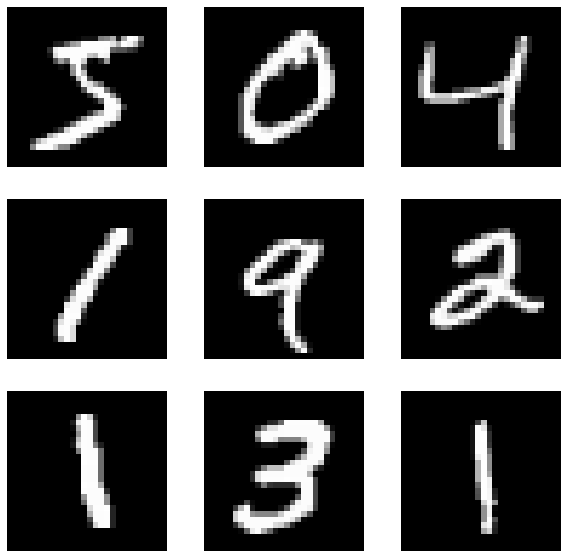

In [7]:
(X_train, y_train), (X_test,y_test)=Get_data()
print('Training shape: {}\nTest shape:{}'.format(X_train.shape[0], X_test.shape[0]))
PlotDigits(X_train)

Normalização:

In [8]:
X_train.mean() , X_train.std()

(33.318447, 78.567444)

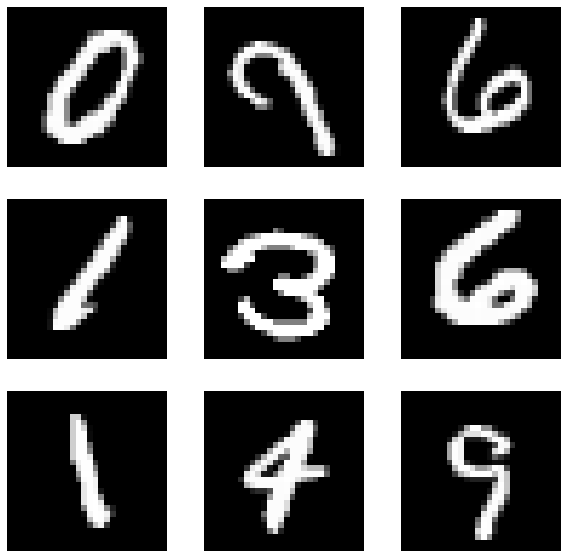

[0 9 6 1 3 6 1 4 9]


In [9]:
# Definir o ImageDataGenerator e ajustar os parametros dos dados
dadaGen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
dadaGen.fit(X_train)
                             
# Definir o ImageDataGenerator e ajustar os parametros dos dados
generator = dadaGen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(generator)
PlotDigits(X_batch)
print(y_batch)

In [10]:
X_batch.mean() , X_batch.std()

(0.032299675, 1.0421768)

Outras transformações:

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


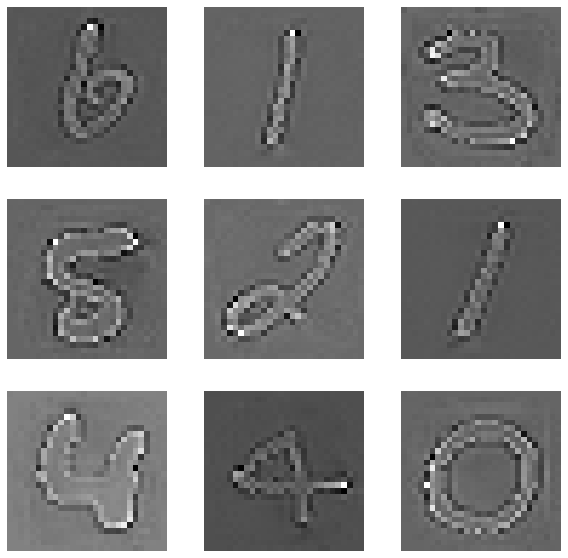

[6 1 3 5 2 1 4 4 0]


In [11]:
dadaGen = ImageDataGenerator(zca_whitening=True)
#dadaGen = ImageDataGenerator(rotation_range=40)
#dadaGen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
dadaGen.fit(X_train)
                             
generator = dadaGen.flow(X_train, y_train, batch_size=9)
X_batch, y_batch = next(generator)
PlotDigits(X_batch)
print(y_batch)    

Juntando tudo:

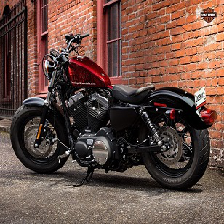

In [12]:
#img_path = 'Chevrolet.jpg'
img_path = 'harley.jpg'
imagem=load_img(img_path, target_size=(224,224,3));imagem

In [13]:
# Transformando a imagem para um tipo array
img_array=img_to_array(imagem).astype('float32')
img_array=img_array.reshape((1,224,224,3));img_array.shape

(1, 224, 224, 3)

In [14]:
dadaGen = ImageDataGenerator(rotation_range=40,\
                             width_shift_range=0.2,\
                             height_shift_range=0.2,\
                             shear_range=0.1,\
                             zoom_range=0.01,\
                             horizontal_flip=True)

bashDados=dadaGen.flow(img_array, batch_size=1,save_to_dir='results', save_prefix='fig', save_format='jpeg')

In [15]:
!mkdir -p results

(-0.5, 223.5, 223.5, -0.5)

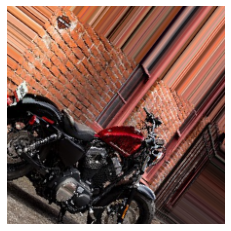

In [16]:
out = next(bashDados)
plt.imshow(out[0].astype(np.int32))
plt.axis('off')